In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [6]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_high

def harmonic(n):
    return sum([1 / (i+1) for i in range(n)])

In [12]:
df = pd.read_csv("100_10000_100.csv"); df

,n,max,empty
0,100,4,35
1,100,4,33
2,100,5,33
3,100,4,32
4,100,3,37
...,...,...,...
9995,10000,6,3726
9996,10000,6,3628
9997,10000,7,3672
9998,10000,6,3664


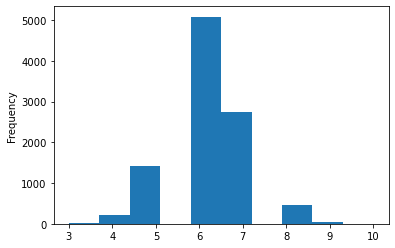

In [39]:
df["max"].plot.hist()

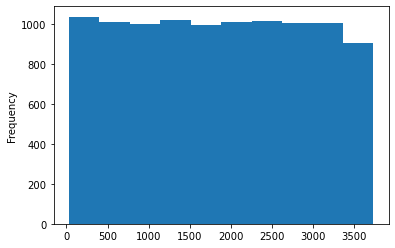

In [14]:
df["empty"].plot.hist()

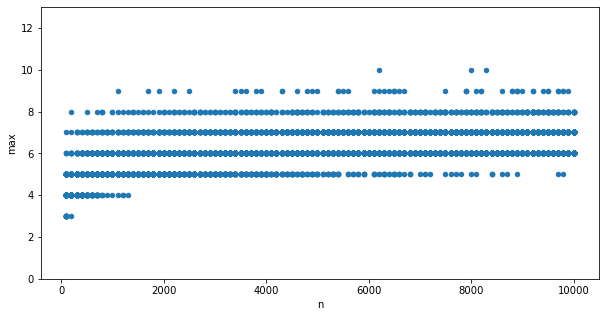

In [10]:
df.plot.scatter(x="n", y="max", figsize=(10, 5), ylim=(0, 13))

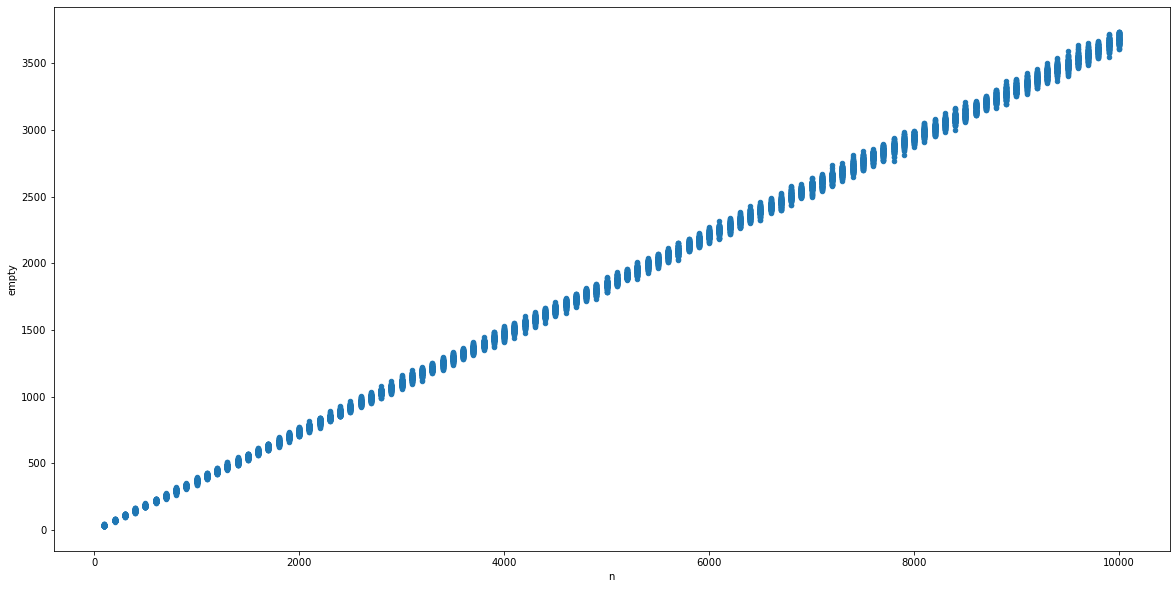

In [11]:
df.plot.scatter(x="n", y="empty", figsize=(20, 10))

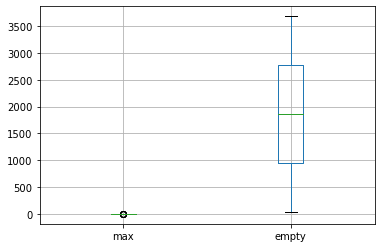

In [34]:
grouped = df.groupby("n")
grouped.mean().boxplot()

In [40]:
grouped.mean()

,max,empty
n,,
100,4.35,36.54
200,4.57,73.15
300,4.85,110.73
400,4.99,146.37
500,5.13,182.73
...,...,...
9600,6.66,3530.32
9700,6.70,3563.37
9800,6.58,3602.23


# Max

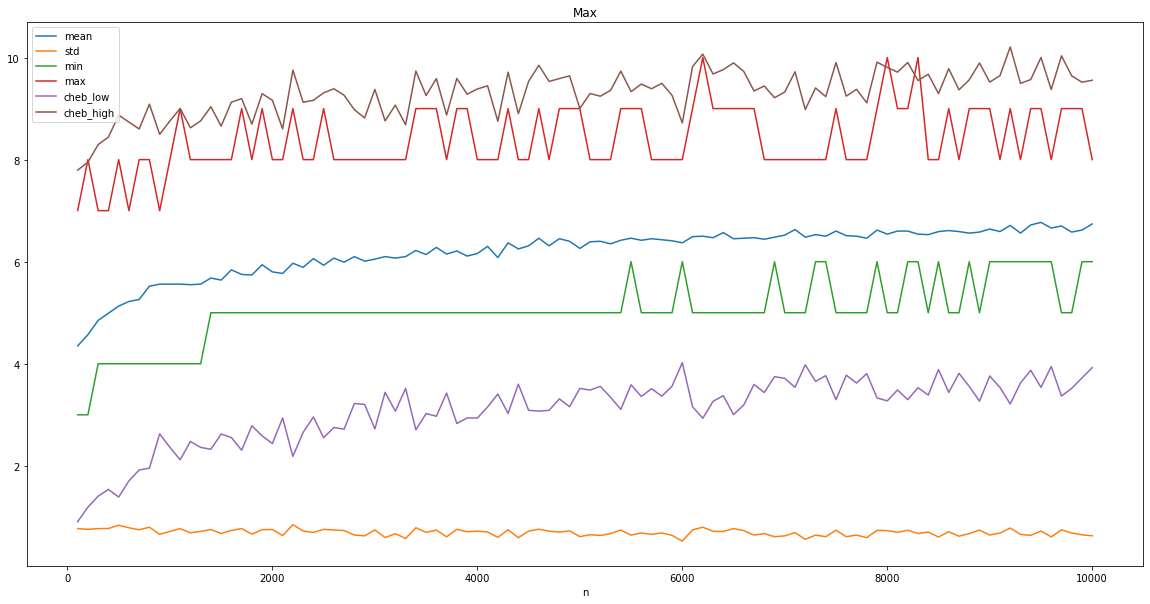

In [18]:
described = grouped["max"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Max", figsize=(20,10))

# Empty
* Niech $Y$ będzie _liczbą pustych urn_
* Szukamy $\mathbb{E}[Y]$
* Niech $X_i$ będą zmiennymi indykatorowymi takimi że jeżeli $X_i = 1$ to _$i$-ta urna jest pusta_, $X_i = 0$ w p.p.

$$Y = X_1 + X_2 + \cdots + X_n$$

Problem sprowadza się do policzenia $\mathbb{E}[X_i]$ dla każdego $i$

$$E[Y] = E[X_1] + E[X_2] + \cdots + E[X_n]$$

Zatem z liniowości:

$$E[X_i] = 1 P(X_i = 1) + 0 P(X_i = 0) = P(X_i = 1) = P(\text{urna $i$ jest pusta}) = \left(1 - \frac{1}{n}\right)^m$$

ostatnia równość bierze się z tego że kule $1, 2, \ldots, m$ muszą wszystkie wpaść do urny różnej od $i$ - każde z prawdopodobieństwem $1 - \frac{1}{n}$.

Stąd

$$E[Y] = \sum_i^n \mathbb{E}[X_i] = \sum_i^n \mathbb{E}\left[\left(1 - \frac{1}{n}\right)^m\right] = n \left(1 - \frac{1}{n}\right)^m$$

Gdy $m = n$

$$E[Y] = n \left(1 - \frac{1}{n}\right)^n = \frac{n}{e}$$

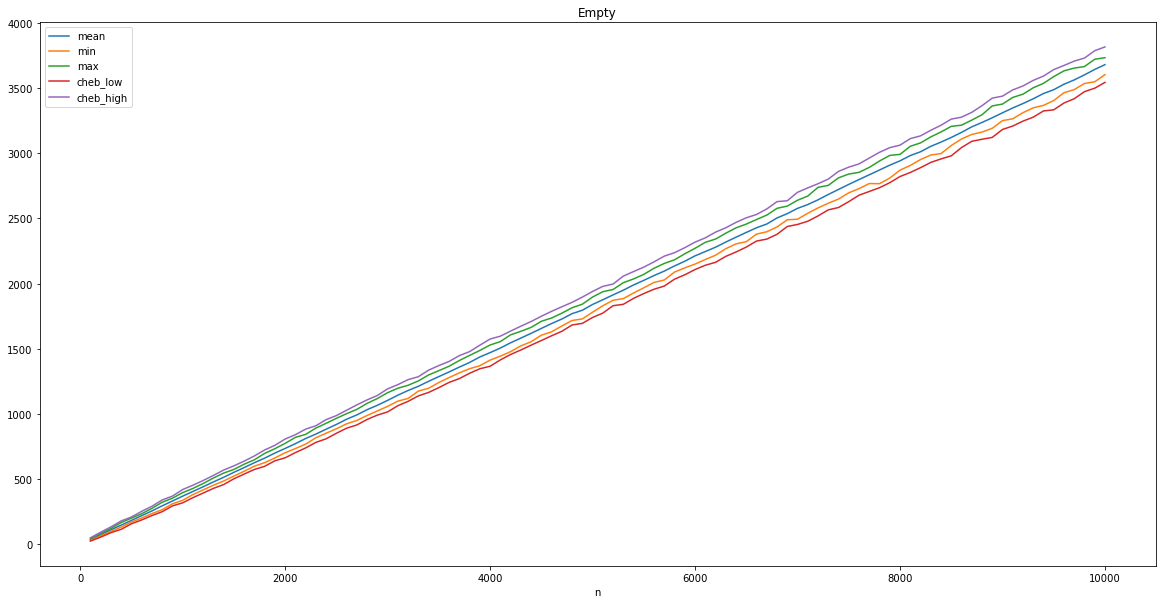

In [25]:
described = grouped["empty"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis=1).plot(title="Empty", figsize=(20,10))